### Using all 8 stations with a P record from 2005-2016: 
### Fisera Ridge, Upper Clearing, Hay Meadow
### Kananaskis, Bow Valley, Kananaskis Pocaterra, Banff CS, Wildcat Hills
### Remove days with P < 0.1 mm
### Plot histograms and best fit probability distributions for wet days using scipy.stats gamma

The next stage in characterising precipitation patterns at MCRB was to fit probability distributions to wet day daily precipitation records, at each of the eight stations, for the 11 years between October 2005 and September 2016. As discussed previously, of the original four alternative dry day threshold values, only two were used for studying wet day distributions: less than 0.1 mm and less than 1.0 mm.

Each of the eight 11-year time series consists of a total of 4019 daily precipitation values. The number of wet days in each series varies according to the selected dry day threshold (see Table ?!?!? _at C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\no_of_wetdays_diff.csv)_. The table shows a significant difference between the number of wet days depending on the threshold value adopted. The higher elevation stations in the mountains, Fisera Ridge (2325 m a.s.l.), Upper Clearing (1845 m a.s.l.), Hay Meadow (1436 m a.s.l.) and Banff CS (1397 m a.s.l.) experience more wet days than those at lower altitudes and on the plain. At these stations, the effect of changing the dry day threshold on wet day numbers is greatest. Clearly more wet days are defined by the lower threshold: for instance, at Fisera Ridge the wet day number is reduced by 761 (33.9%) by increasing the threshold from 0.1 mm to 1.0 mm. At Upper Clearing, the reduction in wet days is 769 (41.4%); at Hay Meadow it is 635 mm (40.9%); while at Banff CS a reduction of 828 mm (45.8 %) is noted.

_?!?!?!? Need to look at the total amount of precipitation (in mm) lost by moving from a threshold of 0.1 mm to 1.0 mm) ?!?!?_

It was decided that the significant loss of wet days associated with the < 1 mm limit was not acceptable. For that reason, a dry day threshold of < 0.1 mm was retained for the remainder of this part of the study. Following this decision, histograms, using 50 bins, were generated for each station and, as expected for daily data, these demonstrated a pattern of exponential-style decay. Python scipy.stats modules were used to optimise parameters to best fit exponential and gamma distributions to the daily data. These are shown in Figure ?!?!? _at C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\prob_plots_0pt1mm_thresh.docx_.



In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from scipy.stats import gamma
from sklearn.linear_model import LinearRegression
import scipy
# import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Read in precip data for all stations

### Fisera Ridge 2325 m, Upper Clearing 1845 m, Hay Meadow 1436 m

In [2]:
# Use pd.read_csv to read csv file
# Fisera Ridge
FRP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\FRdailyprecip.csv", 
                            header=None, names= ["date", "FR_p_mm"])
FRP_df.set_index("date", inplace=True)
# Upper Clearing
UCP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\UCdailyprecip.csv", 
                            header=None, names= ["date", "UC_p_mm"])
UCP_df.set_index("date", inplace=True)
# Hay Meadow
HMP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\HMdailyprecip.csv", 
                            header=None, names= ["date", "HM_p_mm"])
HMP_df.set_index("date", inplace=True)
# drop P values less than 1.0mm
FRP_df = FRP_df.drop(FRP_df[FRP_df.FR_p_mm < 0.1].index)
UCP_df = UCP_df.drop(UCP_df[UCP_df.UC_p_mm < 0.1].index)
HMP_df = HMP_df.drop(HMP_df[HMP_df.HM_p_mm < 0.1].index)

### Kananaskis 1391.1 m

In [3]:
# Use pd.read_csv to read csv file
KP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis\en_climate_daily_AB_3053600_2005-2016_P1D.csv", 
                               header=[0])
KP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'K_p_mm'}, inplace=True) # rename date column
KP_df.set_index("date", inplace=True)
# change datetime format to YMD
KP_df.index = pd.to_datetime(KP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
KP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
KP_df["K_p_mm"] = KP_df["K_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
KP_df.drop(KP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
KP_df.drop(KP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
KP_df = KP_df.drop(KP_df[KP_df.K_p_mm < 0.1].index)

### Bow Valley 1297.5 m

In [4]:
# Use pd.read_csv to read csv file
BVP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Bow_Valley\en_climate_daily_AB_3050778_2005-2016_P1D.csv", 
                               header=[0])
BVP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BV_p_mm'}, inplace=True) # rename date column
BVP_df.set_index("date", inplace=True)
# change datetime format to YMD
BVP_df.index = pd.to_datetime(BVP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BVP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BVP_df["BV_p_mm"] = BVP_df["BV_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
BVP_df.drop(BVP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# need to drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
BVP_df.drop(BVP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
BVP_df = BVP_df.drop(BVP_df[BVP_df.BV_p_mm < 0.1].index)

### Kananaskis Pocaterra 1610.0 m

In [5]:
# Use pd.read_csv to read csv file
KPP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis_Pocaterra\en_climate_daily_AB_3053604_2005-2016_P1D.csv", 
                               header=[0])
KPP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'KP_p_mm'}, inplace=True) # rename date column
KPP_df.set_index("date", inplace=True)
# change datetime format to YMD
KPP_df.index = pd.to_datetime(KPP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
KPP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
KPP_df["KP_p_mm"] = KPP_df["KP_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
KPP_df.drop(KPP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# need to drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
KPP_df.drop(KPP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
KPP_df = KPP_df.drop(KPP_df[KPP_df.KP_p_mm < 0.1].index)

### Banff CS 1396.9 m

In [6]:
# Use pd.read_csv to read csv file
BCSP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Banff_CS\en_climate_daily_AB_3050519_2005-2016_P1D.csv", 
                               header=[0])
BCSP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BCS_p_mm'}, inplace=True) # rename date column
BCSP_df.set_index("date", inplace=True)
# change datetime format to YMD
BCSP_df.index = pd.to_datetime(BCSP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BCSP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BCSP_df["BCS_p_mm"] = BCSP_df["BCS_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
BCSP_df.drop(BCSP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
BCSP_df.drop(BCSP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
BCSP_df = BCSP_df.drop(BCSP_df[BCSP_df.BCS_p_mm < 0.1].index)

### Wildcat Hills 1268.0 m

In [7]:
# Use pd.read_csv to read csv file
WHP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Wild_Cat_Hills\en_climate_daily_AB_3037550_2005-2016_P1D.csv", 
                               header=[0])
WHP_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'WH_p_mm'}, inplace=True) # rename date column
WHP_df.set_index("date", inplace=True)
# change datetime format to YMD
WHP_df.index = pd.to_datetime(WHP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
WHP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
WHP_df["WH_p_mm"] = WHP_df["WH_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
WHP_df.drop(WHP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
WHP_df.drop(WHP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
WHP_df = WHP_df.drop(WHP_df[WHP_df.WH_p_mm < 0.1].index)

### Calculate number of wet days for < 0.1 mm threshold

In [8]:
# check how many wet days there are at each station (from highest elev to lowest)
print("FR wet days (2325 m) =", len(FRP_df))
print("UC wet days (1845 m) =", len(UCP_df))
print("KP wet days (1610 m) =", len(KPP_df))
print("HM wet days (1436 m) =", len(HMP_df))
print("BCS wet days (1397 m) =", len(BCSP_df))
print("K wet days (1391 m) =", len(KP_df))
print("BV wet days (1298 m) =", len(BVP_df))
print("WH wet days (1268 m) =", len(WHP_df))

FR wet days (2325 m) = 2243
UC wet days (1845 m) = 1925
KP wet days (1610 m) = 786
HM wet days (1436 m) = 1551
BCS wet days (1397 m) = 1808
K wet days (1391 m) = 1298
BV wet days (1298 m) = 1543
WH wet days (1268 m) = 1195


### Plot histogram and fit gamma probability distributions for wet days at each station in descending order of elevation. Also, produce plots with exp dist on for my thesis chapter.

### Fisera Ridge 2325 m

shape = 0.6245379571330393 scale = 8.414216513970198


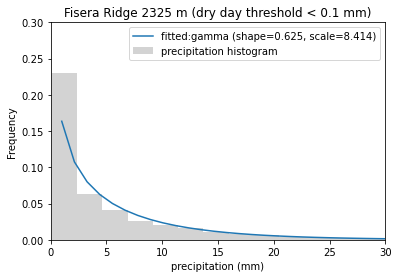

In [48]:
# gamma fit only
x = np.linspace(1, max(FRP_df.FR_p_mm), 100)
y = FRP_df.FR_p_mm
# histogram
FRP_df.FR_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
y = gamma.pdf(x, shape, loc, scale)
# plot
plt.plot(x, y, label='fitted:gamma (shape=0.625, scale=8.414)')
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Fisera Ridge 2325 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\FRgamma.png')

shape = 0.6245379571330393 scale = 8.414216513970198
exponential: (0.10000000000000853, 5.154997592510022)


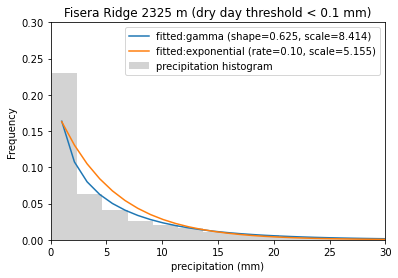

In [49]:
# gamma fit and exp
x = np.linspace(1, max(FRP_df.FR_p_mm), 100)
y = FRP_df.FR_p_mm
# histogram
FRP_df.FR_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
gamma_fit = gamma.pdf(x, shape, loc, scale)
plt.plot(x, gamma_fit, label='fitted:gamma (shape=0.625, scale=8.414)')
# fit expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
expon_fit = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, expon_fit, label='fitted:exponential (rate=0.10, scale=5.155)')
# plot
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Fisera Ridge 2325 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\FRgammaexp.png')

# START HERE 1/3/22

### Upper Clearing 1845 m

shape = 0.6152804293958083 scale = 6.482204146434244


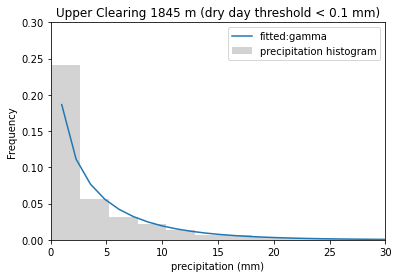

In [31]:
# gamma fit only
x = np.linspace(1, max(UCP_df.UC_p_mm), 100)
y = UCP_df.UC_p_mm
# histogram
UCP_df.UC_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
y = gamma.pdf(x, shape, loc, scale)
plt.plot(x, y, label='fitted:gamma')
# plot
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Upper Clearing 1845 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\UCgamma.png')

shape = 0.6152804293958083 scale = 6.482204146434244
exponential: (0.10000000000000142, 3.888373350649349)


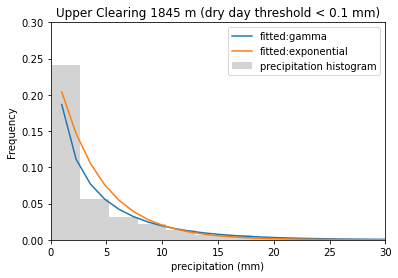

In [30]:
# gamma fit and exp
x = np.linspace(1, max(UCP_df.UC_p_mm), 100)
y = UCP_df.UC_p_mm
# histogram
UCP_df.UC_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
gamma_fit = gamma.pdf(x, shape, loc, scale)
plt.plot(x, gamma_fit, label='fitted:gamma')
# fit expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
expon_fit = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, expon_fit, label='fitted:exponential')
# plot
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Upper Clearing 1845 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\UCgammaexp.png')

### Kananskis Pocaterra 1610 m, 653 wet days

shape = 0.9135708182564797 scale = 4.880326827357443


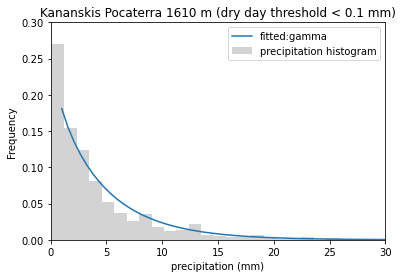

In [29]:
# gamma fit only
x = np.linspace(1, max(KPP_df.KP_p_mm), 100)
y = KPP_df.KP_p_mm
# histogram
KPP_df.KP_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
y = gamma.pdf(x, shape, loc, scale)
# plot
plt.plot(x, y, label='fitted:gamma')
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Kananskis Pocaterra 1610 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\KPgamma.png')

shape = 0.9135708182564797 scale = 4.880326827357443
exponential: (0.1, 4.358524173027989)


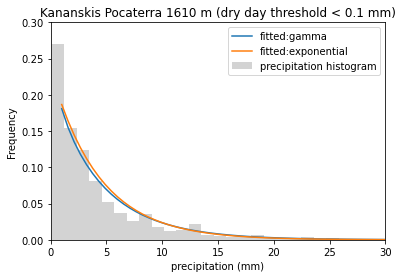

In [28]:
# gamma fit and exp
x = np.linspace(1, max(KPP_df.KP_p_mm), 100)
y = KPP_df.KP_p_mm
# histogram
KPP_df.KP_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
gamma_fit = gamma.pdf(x, shape, loc, scale)
plt.plot(x, gamma_fit, label='fitted:gamma')
# fit expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
expon_fit = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, expon_fit, label='fitted:exponential')
# plot
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Kananskis Pocaterra 1610 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\KPgammaexp.png')

### Hay Meadow 1436 m, 916 wet days

shape = 0.6430509324642836 scale = 5.9930625909503945


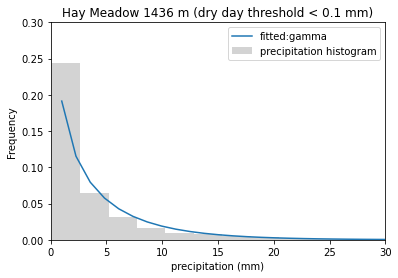

In [33]:
# gamma fit only
x = np.linspace(1, max(HMP_df.HM_p_mm), 100)
y = HMP_df.HM_p_mm
# histogram
HMP_df.HM_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
y = gamma.pdf(x, shape, loc, scale)
# plot
plt.plot(x, y, label='fitted:gamma')
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Hay Meadow 1436 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\HMgamma.png')

shape = 0.6430509324642836 scale = 5.9930625909503945
exponential: (0.10000000000000098, 3.7538444874274655)


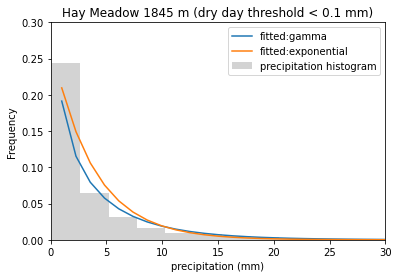

In [26]:
# gamma fit and exp
x = np.linspace(1, max(HMP_df.HM_p_mm), 100)
y = HMP_df.HM_p_mm
# histogram
HMP_df.HM_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
gamma_fit = gamma.pdf(x, shape, loc, scale)
plt.plot(x, gamma_fit, label='fitted:gamma')
# fit expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
expon_fit = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, expon_fit, label='fitted:exponential')
# plot
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Hay Meadow 1845 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\HMgammaexp.png')

### Banff CS 1397 m, 980 wet days

shape = 0.7186828920467333 scale = 3.6904561503637088


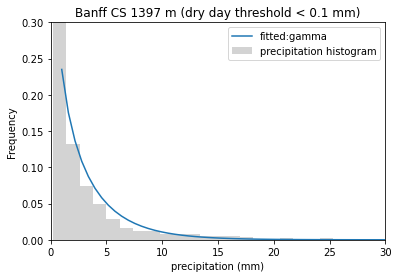

In [32]:
# gamma fit only
x = np.linspace(1, max(BCSP_df.BCS_p_mm), 100)
y = BCSP_df.BCS_p_mm
# histogram
BCSP_df.BCS_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
y = gamma.pdf(x, shape, loc, scale)
# plot
plt.plot(x, y, label='fitted:gamma')
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Banff CS 1397 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\BCSgamma.png')

shape = 0.7186828920467333 scale = 3.6904561503637088
exponential: (0.2, 2.452267699115044)


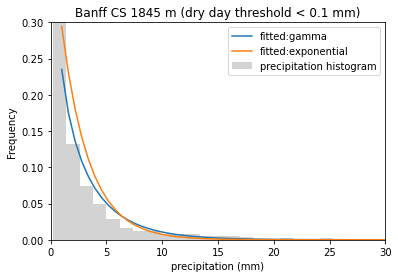

In [24]:
# gamma fit and exp
x = np.linspace(1, max(BCSP_df.BCS_p_mm), 100)
y = BCSP_df.BCS_p_mm
# histogram
BCSP_df.BCS_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
gamma_fit = gamma.pdf(x, shape, loc, scale)
plt.plot(x, gamma_fit, label='fitted:gamma')
# fit expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
expon_fit = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, expon_fit, label='fitted:exponential')
# plot
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Banff CS 1845 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\BCSgammaexp.png')

### Kananaskis 1391 m, 1027 wet days

shape = 0.7598091528573285 scale = 7.845616244473983


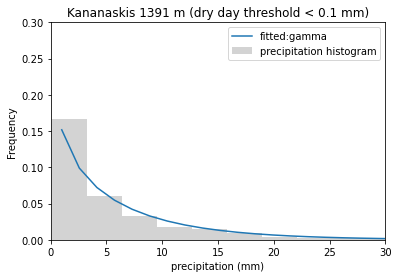

In [34]:
# gamma fit only
x = np.linspace(1, max(KP_df.K_p_mm), 100)
y = KP_df.K_p_mm
# histogram
KP_df.K_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
y = gamma.pdf(x, shape, loc, scale)
# plot
plt.plot(x, y, label='fitted:gamma')
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Kananaskis 1391 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\Kgamma.png')

shape = 0.7598091528573285 scale = 7.845616244473983
exponential: (0.1, 5.861171032357473)


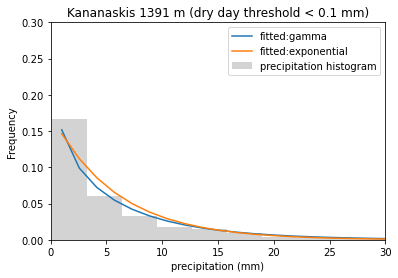

In [37]:
# gamma fit and exp
x = np.linspace(1, max(KP_df.K_p_mm), 100)
y = KP_df.K_p_mm
# histogram
KP_df.K_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
gamma_fit = gamma.pdf(x, shape, loc, scale)
plt.plot(x, gamma_fit, label='fitted:gamma')
# fit expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
expon_fit = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, expon_fit, label='fitted:exponential')
# plot
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Kananaskis 1391 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\Kgammaexp.png')

### Bow Valley 1298 m, 947 wet days

shape = 0.7012066793622144 scale = 5.513317950945641


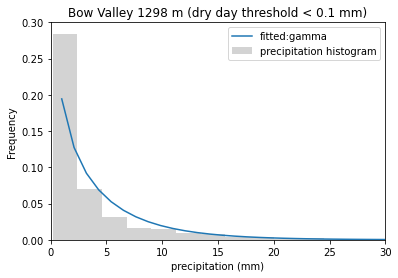

In [36]:
# gamma fit only
x = np.linspace(1, max(BVP_df.BV_p_mm), 100)
y = BVP_df.BV_p_mm
# histogram
BVP_df.BV_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
y = gamma.pdf(x, shape, loc, scale)
# plot
plt.plot(x, y, label='fitted:gamma')
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Bow Valley 1298 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\BVgamma.png')

shape = 0.7012066793622144 scale = 5.513317950945641
exponential: (0.2, 3.665975372650681)


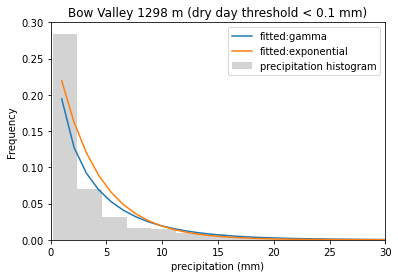

In [38]:
# gamma fit and exp
x = np.linspace(1, max(BVP_df.BV_p_mm), 100)
y = BVP_df.BV_p_mm
# histogram
BVP_df.BV_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
gamma_fit = gamma.pdf(x, shape, loc, scale)
plt.plot(x, gamma_fit, label='fitted:gamma')
# fit expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
expon_fit = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, expon_fit, label='fitted:exponential')
# plot
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Bow Valley 1298 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\BVgammaexp.png')

### Wildcat Hills 1268 m, 919 wet days

shape = 0.8718563652085938 scale = 5.222444818915564


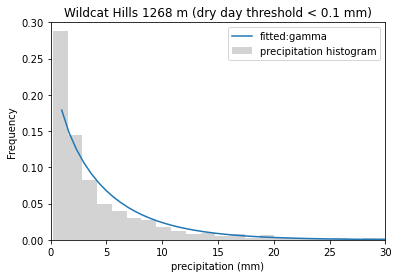

In [39]:
# gamma fit only
x = np.linspace(1, max(WHP_df.WH_p_mm), 100)
y = WHP_df.WH_p_mm
# histogram
WHP_df.WH_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
y = gamma.pdf(x, shape, loc, scale)
# plot
plt.plot(x, y, label='fitted:gamma')
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Wildcat Hills 1268 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\WHgamma.png')

shape = 0.8718563652085938 scale = 5.222444818915564
exponential: (0.2, 4.353221757322176)


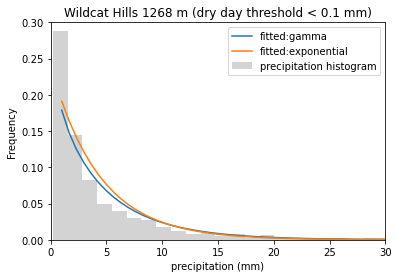

In [40]:
# gamma fit and exp
x = np.linspace(1, max(WHP_df.WH_p_mm), 100)
y = WHP_df.WH_p_mm
# histogram
WHP_df.WH_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# fit gamma
shape, loc, scale = gamma.fit(y, floc=0)
print("shape =", shape, "scale =", scale)
gamma_fit = gamma.pdf(x, shape, loc, scale)
plt.plot(x, gamma_fit, label='fitted:gamma')
# fit expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
expon_fit = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, expon_fit, label='fitted:exponential')
# plot
plt.xlabel('precipitation (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Wildcat Hills 1268 m (dry day threshold < 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\WHgammaexp.png')